In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
from pprint import pprint
from scipy.stats import pearsonr, spearmanr, shapiro, chi2_contingency
from scipy.stats import mannwhitneyu

1.

In [4]:
df = pd.read_csv("bank_loan.csv")

In [5]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2050 non-null   object 
 1   Age                         2050 non-null   int64  
 2   AnnualIncome                2050 non-null   int64  
 3   CreditScore                 2050 non-null   int64  
 4   EmploymentStatus            1976 non-null   object 
 5   EducationLevel              2050 non-null   object 
 6   Experience                  2050 non-null   int64  
 7   LoanAmount                  2050 non-null   object 
 8   LoanDuration                2050 non-null   int64  
 9   MaritalStatus               2050 non-null   object 
 10  NumberOfDependents          1963 non-null   float64
 11  HomeOwnershipStatus         1951 non-null   object 
 12  MonthlyDebtPayments         2009 non-null   float64
 13  CreditCardUtilizationRate   2050 

In [7]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,1963.000000,2009.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,1936.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,39.952195,1.558224e+05,572.662927,17.353659,54.058537,1.455425,457.295669,0.294761,2.848780,0.968780,...,4759.490569,0.791977,5.076963,7.737341e+04,0.240882,0.240792,931.094014,0.405455,50.774927,0.239024
std,11.702246,9.780950e+05,63.820500,11.614698,24.404283,1.367463,239.521001,0.162348,1.899773,0.969018,...,3156.760304,0.122874,2.229185,1.340863e+05,0.035993,0.042887,710.769016,0.334684,7.745501,0.426592
min,18.000000,1.500000e+04,384.000000,-4.000000,12.000000,0.000000,85.000000,0.004364,-4.000000,0.000000,...,625.000000,0.276100,0.000000,1.018000e+03,0.130338,0.113310,118.491581,0.034436,30.400000,0.000000
25%,32.000000,3.274900e+04,538.000000,9.000000,36.000000,0.000000,289.000000,0.169033,2.000000,0.000000,...,2586.062500,0.712901,3.000000,9.073750e+03,0.215449,0.210321,511.277136,0.180706,46.000000,0.000000
50%,40.000000,4.926900e+04,575.000000,17.000000,48.000000,1.000000,405.000000,0.278739,3.000000,1.000000,...,3869.750000,0.809762,5.000000,3.569450e+04,0.238110,0.237375,735.522113,0.305972,51.000000,0.000000
75%,48.000000,7.434200e+04,608.000000,25.000000,72.000000,2.000000,568.000000,0.401770,4.000000,2.000000,...,5931.875000,0.887293,6.000000,9.202675e+04,0.264231,0.268571,1118.015055,0.518579,56.000000,0.000000
max,80.000000,1.000000e+07,950.000000,60.000000,120.000000,5.000000,2375.000000,0.835776,10.000000,5.000000,...,21606.500000,0.996563,12.000000,1.645402e+06,0.384555,0.395984,7859.855080,4.143180,76.000000,1.000000


In [8]:
df.shape

(2050, 36)

In [9]:
print(df.columns)

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'RiskScore', 'LoanApproved'],
      dtype='object')


2.

In [10]:
print(df.isnull().sum()[df.isnull().sum() > 0])

EmploymentStatus        74
NumberOfDependents      87
HomeOwnershipStatus     99
MonthlyDebtPayments     41
JobTenure              114
dtype: int64


In [11]:
df_missing_cols = df[df.columns[df.isnull().any()]]

In [12]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])

EmploymentStatus       3.609756
NumberOfDependents     4.243902
HomeOwnershipStatus    4.829268
MonthlyDebtPayments    2.000000
JobTenure              5.560976
dtype: float64


In [13]:
print(df["EmploymentStatus"].value_counts(dropna=False))
print("-" * 30)
print(df["HomeOwnershipStatus"].value_counts(dropna=False))

EmploymentStatus
Employed         1698
Self-Employed     152
Unemployed        126
NaN                74
Name: count, dtype: int64
------------------------------
HomeOwnershipStatus
Mortgage    779
Rent        602
Own         368
Other       202
NaN          99
Name: count, dtype: int64


In [14]:
print(df["NumberOfDependents"].value_counts(dropna=False).sort_index())
print("-" * 30)
print(df["MonthlyDebtPayments"].describe())
print("-" * 30)
print(df["JobTenure"].describe())

NumberOfDependents
0.0    642
1.0    462
2.0    402
3.0    289
4.0    116
5.0     52
NaN     87
Name: count, dtype: int64
------------------------------
count    2009.000000
mean      457.295669
std       239.521001
min        85.000000
25%       289.000000
50%       405.000000
75%       568.000000
max      2375.000000
Name: MonthlyDebtPayments, dtype: float64
------------------------------
count    1936.000000
mean        5.076963
std         2.229185
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        12.000000
Name: JobTenure, dtype: float64


In [15]:
# به نظرم حتی میشه برای نامشخص یه دسته عددی تعریف کرد یا حتی با مد پرش کرد
df["HomeOwnershipStatus"] = df["HomeOwnershipStatus"].fillna("Unknown")

df["EmploymentStatus"] = df["EmploymentStatus"].fillna(
    df["EmploymentStatus"].mode()[0]
)

# با میانه پر کردم گفتم میانگین  احتمال تحت تاثیر داده های بزرگ و کوچک و پرته
numeric_cols = ["NumberOfDependents", "MonthlyDebtPayments", "JobTenure"]
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [16]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


3.

In [17]:
# خب به نظرم قبل اینکه در رابطه با داده های پرت تصمیم بگیرم بیام و تحلیل تک متغیره انجام بدم ، اینجوری بهتر میشه تصمیم گرفت
# میخوام یه تابع بنویسم اسم ستون رو بهش بدم اطلاعات آماری اون ستون رو برام برگردونه و متناسب با نوع داده تصمیم بگیره

In [18]:
# def univariate_analysis_godmode(series, plot=True):
#     col_name = series.name

#     if pd.api.types.is_numeric_dtype(series):
#         median_val = series.median()
#         mode_val = series.mode()[0] if not series.mode().empty else np.nan
#         mean_val = series.mean()
#         std_val = series.std()
#         min_val = series.min()
#         max_val = series.max()
#         q1 = series.quantile(0.25)
#         q3 = series.quantile(0.75)
#         iqr = q3 - q1
#         outliers = series[(series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)]
#         skew_val = skew(series)
#         kurt_val = kurtosis(series)

#         try:
#             stat, p_value = shapiro(series)
#             normality = "Normal" if p_value > 0.05 else "Not Normal"
#         except:
#             normality = "Test Failed"

#         if normality == "Normal":
#             distribution_type = "Normal"
#         else:
#             if skew_val > 0.5:
#                 distribution_type = "Right-skewed"
#             elif skew_val < -0.5:
#                 distribution_type = "Left-skewed"
#             else:
#                 distribution_type = "Approximately Symmetric"

#         report = {
#             "count": len(series),
#             "mean": mean_val,
#             "median": median_val,
#             "mode": mode_val,
#             "std": std_val,
#             "min": min_val,
#             "25%": q1,
#             "75%": q3,
#             "max": max_val,
#             "skew": skew_val,
#             "kurtosis": kurt_val,
#             "outlier_count": len(outliers),
#             "normality": normality,
#             "distribution_type": distribution_type
#         }

#         print(f"\n=== {col_name} Analysis ===")
#         df_report = pd.DataFrame(report, index=[0]).T.rename(columns={0: 'Value'})
#         print(df_report)

#         if plot:
#             plt.figure(figsize=(12, 4))
#             plt.subplot(1, 2, 1)
#             sns.histplot(series, kde=True)
#             plt.title(f"{col_name} - Histogram")
#             plt.subplot(1, 2, 2)
#             sns.boxplot(x=series)
#             plt.title(f"{col_name} - Boxplot")
#             plt.show()

#     else:
#         value_counts = series.value_counts()
#         percentages = (value_counts / len(series) * 100).round(2)
#         report = pd.DataFrame({
#             "count": value_counts,
#             "percentage": percentages
#         })

#         print(f"\n=== {col_name} Analysis ===")
#         print(report)

#         if plot:
#             plt.figure(figsize=(12, 4))
#             plt.subplot(1, 2, 1)
#             sns.countplot(x=series, order=value_counts.index)
#             plt.title(f"{col_name} - Countplot")
#             plt.xticks(rotation=45)
#             plt.tight_layout()
#             plt.show()

#     return report

In [19]:
# res_num = univariate_analysis_godmode(df["MonthlyDebtPayments"])

In [20]:
# res_cat = univariate_analysis_godmode(df["EmploymentStatus"])

In [21]:
# یه ایده دارم بگیره ....

In [22]:
# def dataframe_godmode_advanced(df, plot=True, numeric_only=False, categorical_only=False,
#                                discrete_threshold=0.05, exclude_columns=None, max_discrete_unique=20):
#     if exclude_columns is None:
#         exclude_columns = []

#     results = {}
#     for col in df.columns:
#         if col in exclude_columns:
#             continue
#         series = df[col]

#         if numeric_only and not pd.api.types.is_numeric_dtype(series):
#             continue
#         if categorical_only and pd.api.types.is_numeric_dtype(series):
#             continue

#         col_name = series.name

#         if pd.api.types.is_numeric_dtype(series):
#             n_unique_ratio = series.nunique() / len(series)
#             is_discrete = (n_unique_ratio < discrete_threshold) and (series.nunique() <= max_discrete_unique)

#             median_val = series.median()
#             mode_val = series.mode()[0] if not series.mode().empty else np.nan
#             mean_val = series.mean()
#             std_val = series.std()
#             min_val = series.min()
#             max_val = series.max()
#             q1 = series.quantile(0.25)
#             q3 = series.quantile(0.75)
#             iqr = q3 - q1
#             outliers = series[(series < q1 - 1.5*iqr) | (series > q3 + 1.5*iqr)]
#             skew_val = skew(series)
#             kurt_val = kurtosis(series)

#             try:
#                 stat, p_value = shapiro(series)
#                 normality = "Normal" if p_value > 0.05 else "Not Normal"
#             except:
#                 normality = "Test Failed"

#             if normality == "Normal":
#                 distribution_type = "Normal"
#             else:
#                 if skew_val > 0.5:
#                     distribution_type = "Right-skewed"
#                 elif skew_val < -0.5:
#                     distribution_type = "Left-skewed"
#                 else:
#                     distribution_type = "Approximately Symmetric"

#             report = {
#                 "count": len(series),
#                 "mean": mean_val,
#                 "median": median_val,
#                 "mode": mode_val,
#                 "std": std_val,
#                 "min": min_val,
#                 "25%": q1,
#                 "75%": q3,
#                 "max": max_val,
#                 "skew": skew_val,
#                 "kurtosis": kurt_val,
#                 "outlier_count": len(outliers),
#                 "normality": normality,
#                 "distribution_type": distribution_type,
#                 "discrete": is_discrete
#             }

#             print(f"\n=== {col_name} Analysis (Numeric {'Discrete' if is_discrete else 'Continuous'}) ===")
#             df_report = pd.DataFrame(report, index=[0]).T.rename(columns={0:'Value'})
#             print(df_report)

#             if plot:
#                 plt.figure(figsize=(12, 4))
#                 if is_discrete:
#                     sns.countplot(x=series, order=series.value_counts().index)
#                     plt.title(f"{col_name} - Discrete Countplot")
#                 else:
#                     # انتخاب خودکار bin
#                     n = len(series)
#                     bin_width = 2 * iqr / (n ** (1/3))
#                     bins_fd = int(np.ceil((series.max() - series.min()) / bin_width))
#                     bins_sturges = int(np.ceil(np.log2(n) + 1))
#                     bins_to_use = max(bins_fd, bins_sturges, 5)

#                     plt.subplot(1, 2, 1)
#                     sns.histplot(series, kde=True, bins=bins_to_use)
#                     plt.title(f"{col_name} - Histogram")
#                     plt.subplot(1, 2, 2)
#                     sns.boxplot(x=series)
#                     plt.title(f"{col_name} - Boxplot")
#                 plt.show()

#         else:
#             value_counts = series.value_counts()
#             percentages = (value_counts / len(series) * 100).round(2)
#             report = pd.DataFrame({"count": value_counts, "percentage": percentages})

#             print(f"\n=== {col_name} Analysis (Categorical) ===")
#             print(report)

#             if plot:
#                 plt.figure(figsize=(12, 4))
#                 plt.subplot(1, 2, 1)
#                 sns.countplot(x=series, order=value_counts.index)
#                 plt.title(f"{col_name} - Countplot")
#                 plt.xticks(rotation=45)
#                 plt.subplot(1, 2, 2)
#                 plt.pie(percentages, labels=percentages.index, autopct="%1.1f%%", startangle=90)
#                 plt.title(f"{col_name} - Pie Chart")
#                 plt.tight_layout()
#                 plt.show()

#         results[col_name] = report

#     return results

In [23]:
# res_all = dataframe_godmode_advanced(df, exclude_columns=['ApplicationDate'])

In [24]:
# قبول دارم کنده و شاید یکم کثیف نوشته شده اما کار میکنه

4. آزمون های همبستگی

In [25]:
#**** box-cox , Yeo-Johnson تست شد داده ها با این ابزار ها نرمال نمی شود

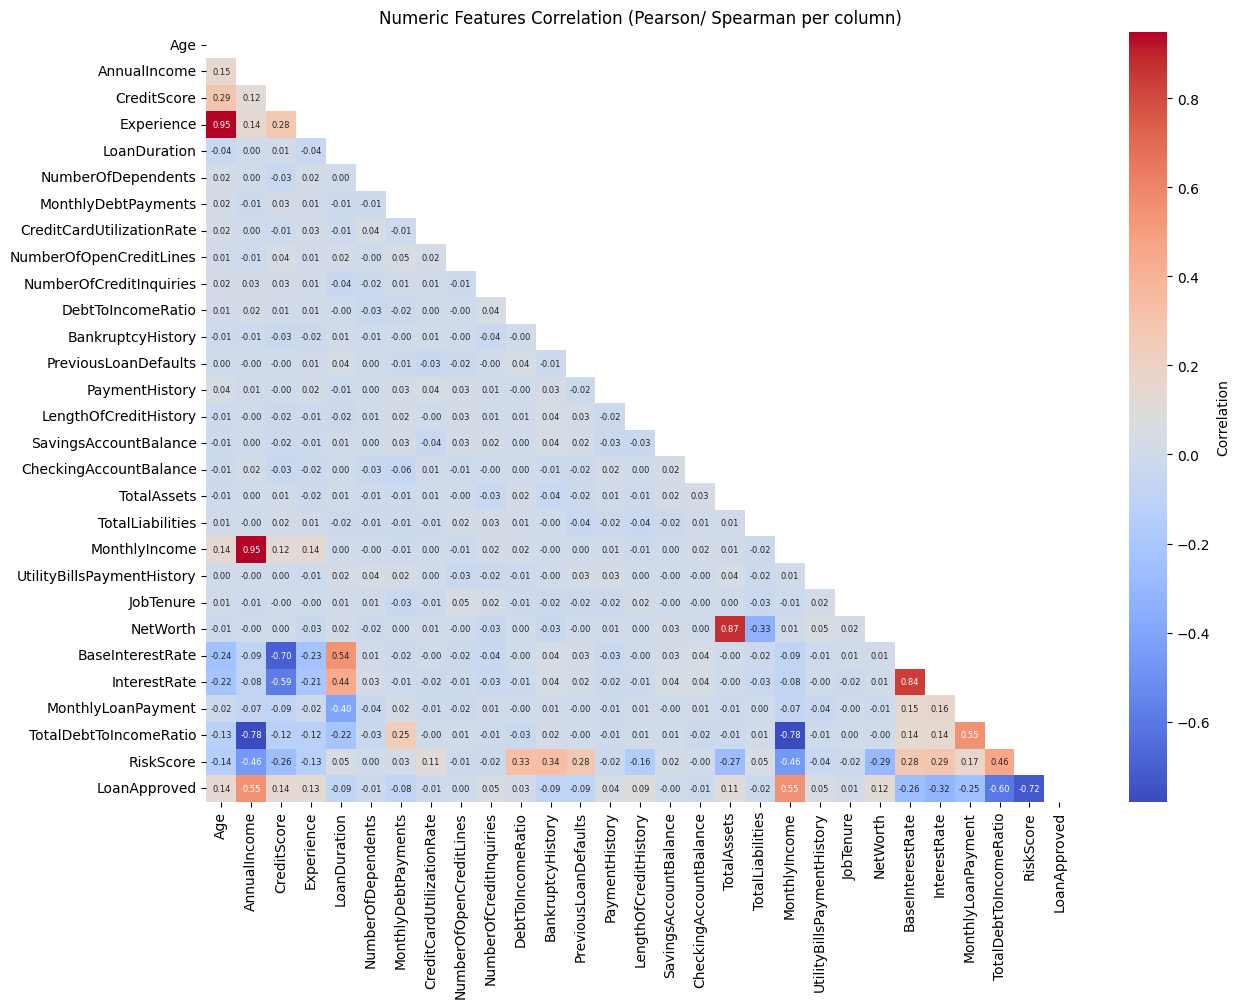

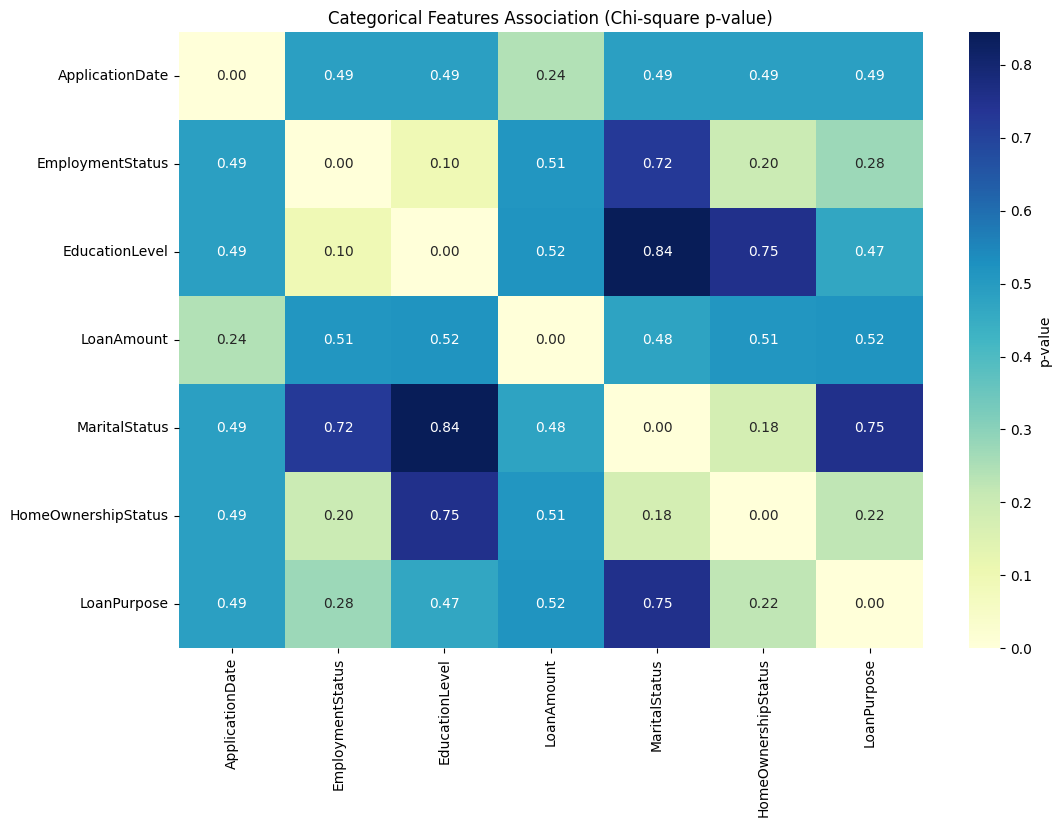

In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = pd.DataFrame(np.nan, index=numeric_cols, columns=numeric_cols)
    
    normality = {}
    for col in numeric_cols:
        stat, p = shapiro(df[col].dropna())
        normality[col] = (p > 0.05)  
    
    for i in numeric_cols:
        for j in numeric_cols:
            if i == j:
                corr_matrix.loc[i,j] = 1.0
            else:
                if normality[i] and normality[j]:
                    corr_matrix.loc[i,j] = df[[i,j]].corr(method='pearson').iloc[0,1]
                else:
                    corr_matrix.loc[i,j] = df[[i,j]].corr(method='spearman').iloc[0,1]
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(14,10))
    sns.heatmap(corr_matrix.round(2), mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
                annot_kws={"size":6}, cbar_kws={"label": "Correlation"})
    plt.title("Numeric Features Correlation (Pearson/ Spearman per column)")
    plt.show()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 1:
    cat_corr = pd.DataFrame(np.nan, index=categorical_cols, columns=categorical_cols)
    for i in categorical_cols:
        for j in categorical_cols:
            if i != j:
                table = pd.crosstab(df[i], df[j])
                chi2, p, dof, ex = chi2_contingency(table)
                cat_corr.loc[i, j] = p
    np.fill_diagonal(cat_corr.values, 0)

    plt.figure(figsize=(12,8))
    sns.heatmap(cat_corr.astype(float), annot=True, fmt=".2f", cmap="YlGnBu", 
                cbar_kws={"label": "p-value"})
    plt.title("Categorical Features Association (Chi-square p-value)")
    plt.show()

In [27]:
def get_column_types(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return numeric_cols, categorical_cols

In [28]:
def corr_analyze(df, target_col):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
    
    results = []

    for col in numeric_cols:
        if col != target_col and df[col].nunique() > 1:
            x = df[col].dropna()
            y = df[target_col].dropna()
            
            try:
                _, p_x = shapiro(x)
                _, p_y = shapiro(y)
                if p_x > 0.05 and p_y > 0.05:
                    corr, p_value = pearsonr(x, y)
                    method = "Pearson"
                else:
                    corr, p_value = spearmanr(x, y)
                    method = "Spearman"
            except:
                corr, p_value = spearmanr(x, y)
                method = "Spearman"

            results.append({
                "Feature": col,
                "Type": "Numeric",
                "Statistic": round(corr, 3),
                "p-value": round(p_value, 4),
                "Method": method
            })

    for col in categorical_cols:
        if col != target_col and df[col].nunique() > 1:
            contingency_table = pd.crosstab(df[col], df[target_col])
            if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                results.append({
                    "Feature": col,
                    "Type": "Categorical",
                    "Statistic": round(chi2, 3),
                    "p-value": round(p, 4),
                    "Method": "Chi-square"
                })

    return pd.DataFrame(results)

In [29]:
analysis_result = corr_analyze(df, "RiskScore")
analysis_result = analysis_result.sort_values(by="p-value")

styled_table = (
    analysis_result.style
    .background_gradient(subset=["p-value"], cmap="coolwarm")
    .set_table_styles([{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]}])
    .hide(axis="index")
)
styled_table


Feature,Type,Statistic,p-value,Method
Age,Numeric,-0.144000,0.000000,Spearman
EducationLevel,Categorical,367.740000,0.000000,Chi-square
EmploymentStatus,Categorical,236.668000,0.000000,Chi-square
LoanApproved,Numeric,-0.722000,0.000000,Spearman
TotalDebtToIncomeRatio,Numeric,0.464000,0.000000,Spearman
MonthlyLoanPayment,Numeric,0.171000,0.000000,Spearman
InterestRate,Numeric,0.293000,0.000000,Spearman
BaseInterestRate,Numeric,0.281000,0.000000,Spearman
NetWorth,Numeric,-0.286000,0.000000,Spearman
MonthlyIncome,Numeric,-0.456000,0.000000,Spearman


In [30]:
significant_features = analysis_result[analysis_result['p-value'] < 0.05]

numeric_significant = significant_features[significant_features['Type'] == 'Numeric'][['Feature', 'Statistic', 'p-value']].sort_values(by='p-value')

categorical_significant = significant_features[significant_features['Type'] == 'Categorical'][['Feature', 'Statistic', 'p-value']].sort_values(by='p-value')


<h3>Applicant's Credit History</h3>
    <ul>
        <li><b>CreditScore:</b> A number representing the applicant's creditworthiness.(numerical)</li>
        <li><b>LengthOfCreditHistory:</b> How many years the applicant has been using credit.(numerical)</li>
        <li><b>NumberOfOpenCreditLines:</b> The total number of active credit accounts the applicant has.(numerical)</li>
        <li><b>CreditCardUtilizationRate:</b> The percentage of the applicant's total available credit that they are currently using.(numerical)</li>
        <li><b>NumberOfCreditInquiries:</b> How many times lenders have formally checked the applicant's credit history recently.(numerical)</li>
        <li><b>BankruptcyHistory:</b> Whether the applicant has ever declared bankruptcy.(numerical)</li>
        <li><b>PreviousLoanDefaults:</b> The number of times the applicant has failed to repay a loan in the past.(numerical)</li>
        <li><b>PaymentHistory:</b> A summary of the applicant's past payment behavior (e.g., 'All payments on time').(numerical)</li>
        <li><b>UtilityBillsPaymentHistory:</b> A summary of how reliably the applicant pays their utility bills.(numerical)</li>
    </ul>


In [31]:
def analyze_binary_column(df, column):
    counts = df[column].value_counts().sort_index()
    total = len(df[column])
    percents = (counts / total * 100).round(2)

    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index, y=counts.values, palette='Paired')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percents
    })
    print("Summary statistics:")
    print(summary_df)
    
    most_value = counts.idxmax()
    most_percent = percents[most_value]
    least_value = counts.idxmin()
    least_percent = percents[least_value]

In [32]:
def plot_numeric_vs_target(df, numeric_col, target_col):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Analysis of {numeric_col} by {target_col}', fontsize=16)

    sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
    axes[0, 0].set_title('Boxplot by Target')

    for target_val in df[target_col].unique():
        sns.histplot(df[df[target_col] == target_val][numeric_col],
                     ax=axes[0, 1], bins=30, label=f'{target_col}={target_val}', alpha=0.6)
    axes[0, 1].set_title('Histogram by Target')
    axes[0, 1].legend()

    for target_val in df[target_col].unique():
        sns.kdeplot(df[df[target_col] == target_val][numeric_col],
                    ax=axes[1, 0], label=f'{target_col}={target_val}', fill=True, alpha=0.4)
    axes[1, 0].set_title('Density Plot by Target')
    axes[1, 0].legend()

    sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,
                  palette='cividis', jitter=True, alpha=0.5)
    axes[1, 1].set_title('Data Distribution (Strip Plot)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [33]:
def plot_numeric_distribution(df, column):
    
    # histogram, KDE, boxplot for a numeric column.
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), 
                             gridspec_kw={'height_ratios': [3, 1]})
    
    # Histogram + KDE
    sns.histplot(df[column].dropna(), bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen')
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

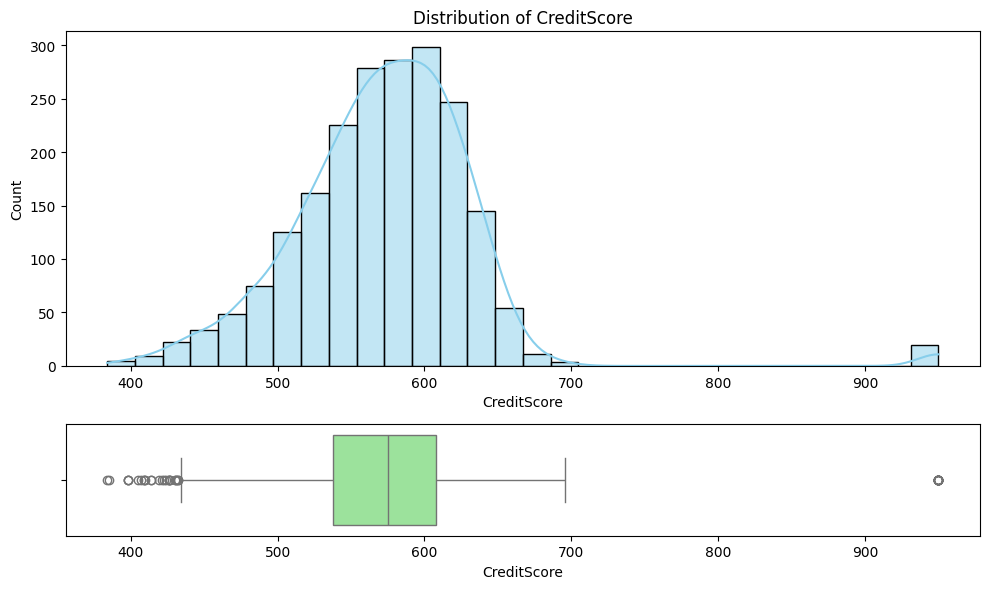

count    2050.000000
mean      572.662927
std        63.820500
min       384.000000
25%       538.000000
50%       575.000000
75%       608.000000
max       950.000000
Name: CreditScore, dtype: float64

In [34]:
plot_numeric_distribution(df,'CreditScore')
df['CreditScore'].describe()

Distribution: slightly right-skewed

Most values fall between 538 and 608.

Median is around 575.

A few outliers go above 900, indicating unusually high values.


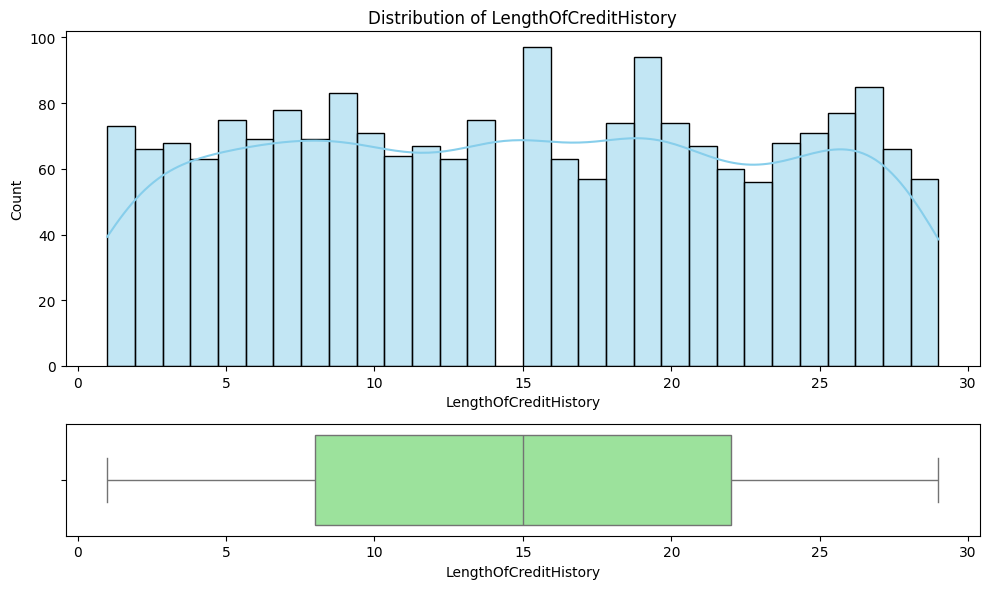

count    2050.000000
mean       14.942439
std         8.289162
min         1.000000
25%         8.000000
50%        15.000000
75%        22.000000
max        29.000000
Name: LengthOfCreditHistory, dtype: float64

In [35]:
plot_numeric_distribution(df, 'LengthOfCreditHistory')
df['LengthOfCreditHistory'].describe()

Distribution: uniform

Most values fall between 8 and 22.

Median is around 15.

A few outliers are close to 29, indicating unusually high values compared to the median.


C:\Users\ali\AppData\Local\Temp\ipykernel_16912\3851314117.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired')


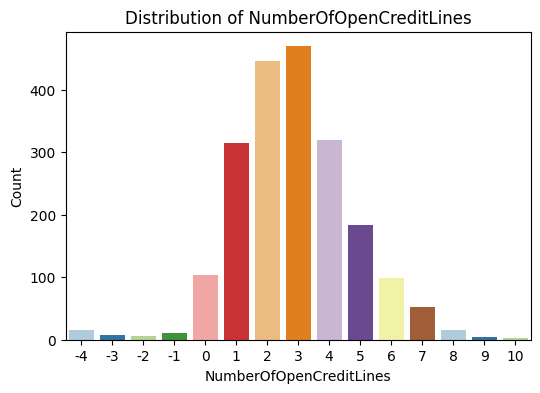

Summary statistics:
                         Count  Percentage
NumberOfOpenCreditLines                   
-4                          16        0.78
-3                           8        0.39
-2                           6        0.29
-1                          11        0.54
 0                         103        5.02
 1                         315       15.37
 2                         446       21.76
 3                         469       22.88
 4                         319       15.56
 5                         184        8.98
 6                          99        4.83
 7                          53        2.59
 8                          15        0.73
 9                           4        0.20
 10                          2        0.10


In [36]:
analyze_binary_column(df, 'NumberOfOpenCreditLines')

Distribution: discrete

Most applicants have 2–4 open credit lines (≈60% of the population).

Mode is 3, indicating a typical applicant has 3 open credit lines.

A few applicants have unusually low or negative values (from -4 to -1, ≈2%) that should be investigated as potential data errors.

Some applicants have very high numbers of open credit lines (up to 10, ≈0.1%), representing outliers with potentially higher risk.


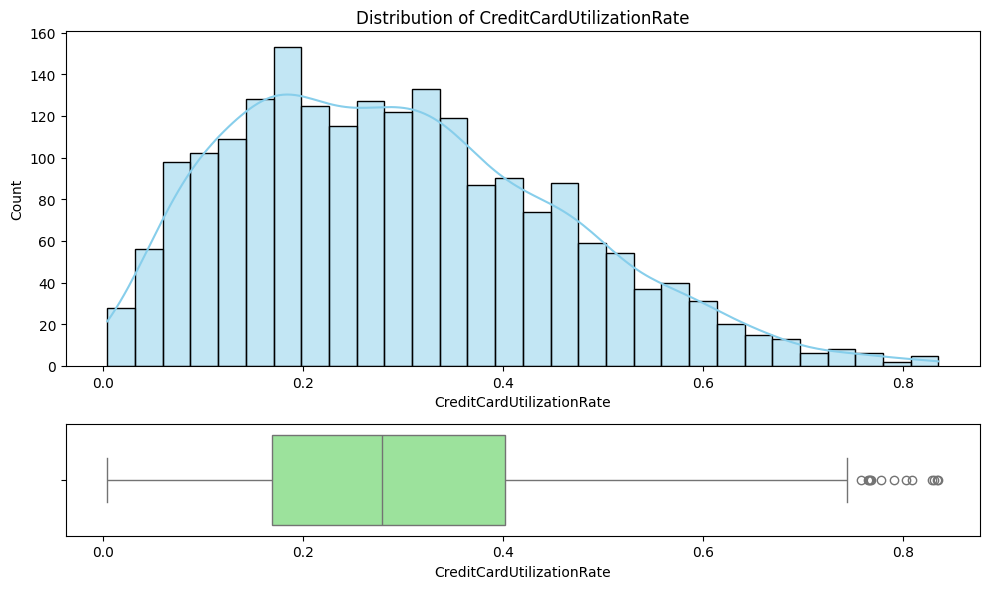

count    2050.000000
mean        0.294761
std         0.162348
min         0.004364
25%         0.169033
50%         0.278739
75%         0.401770
max         0.835776
Name: CreditCardUtilizationRate, dtype: float64

In [37]:
plot_numeric_distribution(df, 'CreditCardUtilizationRate')
df['CreditCardUtilizationRate'].describe()


Distribution: right-skewed

Most values fall between 0.17 and 0.40.

Median is around 0.28 (≈28%).

A few outliers exceed 0.80, indicating very high ratios compared to the majority.


C:\Users\ali\AppData\Local\Temp\ipykernel_16912\3851314117.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired')


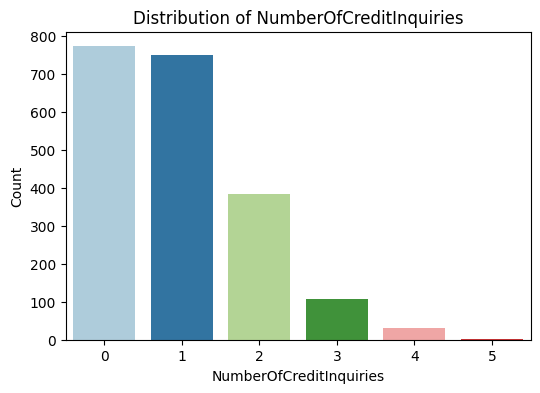

Summary statistics:
                         Count  Percentage
NumberOfCreditInquiries                   
0                          773       37.71
1                          749       36.54
2                          385       18.78
3                          108        5.27
4                           32        1.56
5                            3        0.15


In [38]:
analyze_binary_column(df, 'NumberOfCreditInquiries')

Distribution: discrete

Most applicants have 0–1 credit inquiries (≈74% of the population).

Mode is around 0

A few applicants have higher numbers of inquiries (up to 5, ≈0.15%), representing outliers with potentially higher credit activity.


C:\Users\ali\AppData\Local\Temp\ipykernel_16912\3851314117.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired')


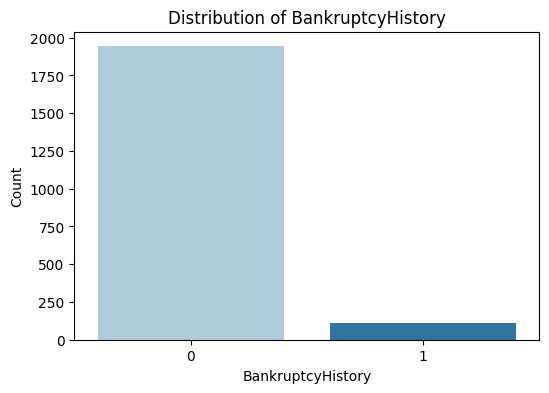

Summary statistics:
                   Count  Percentage
BankruptcyHistory                   
0                   1942       94.73
1                    108        5.27


In [39]:
analyze_binary_column(df, 'BankruptcyHistory')

Distribution: binomial

Most applicants have no previous loan defaults (0) (≈90.1%).

A few applicants have had previous loan defaults (1, ≈9.95%), indicating a small fraction with this risk factor.


C:\Users\ali\AppData\Local\Temp\ipykernel_16912\3851314117.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired')


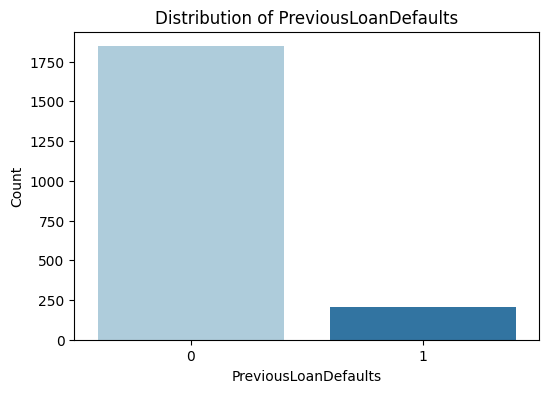

Summary statistics:
                      Count  Percentage
PreviousLoanDefaults                   
0                      1846       90.05
1                       204        9.95


In [40]:
analyze_binary_column(df, 'PreviousLoanDefaults')

Distribution: binomial

Most applicants have no previous loan defaults (0) (≈90.1%).

A few applicants have had previous loan defaults (1, ≈9.95%), indicating a small fraction with this risk factor.


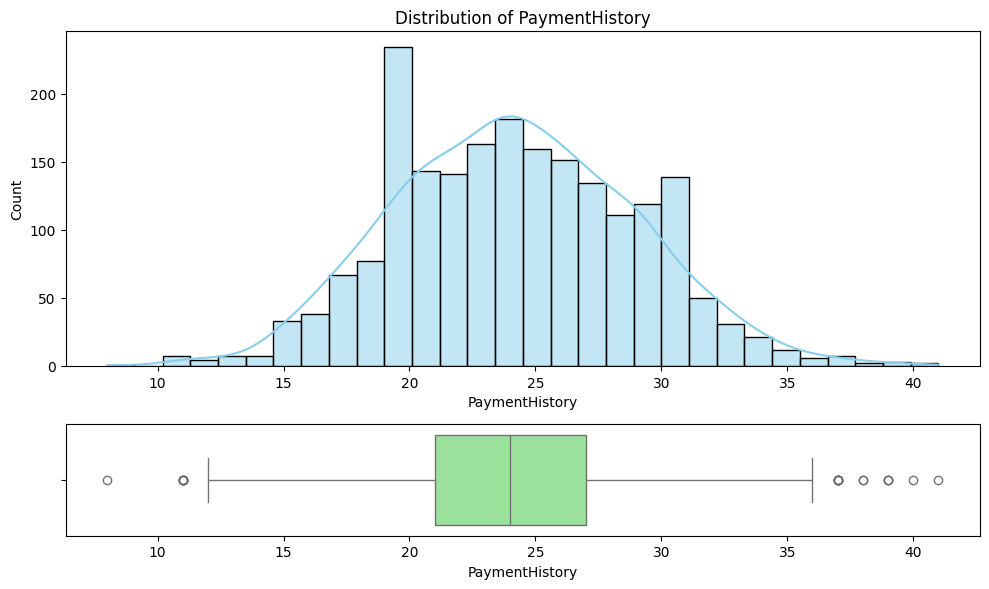

count    2050.000000
mean       24.163902
std         4.777169
min         8.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        41.000000
Name: PaymentHistory, dtype: float64

In [41]:
plot_numeric_distribution(df, 'PaymentHistory')
df['PaymentHistory'].describe()

Distribution: left-skewed

Most values fall between 0.71 and 0.89.

Median is around 0.81 (≈81%).

A few outliers are as low as 0.28, indicating unusually small values compared to the majority.


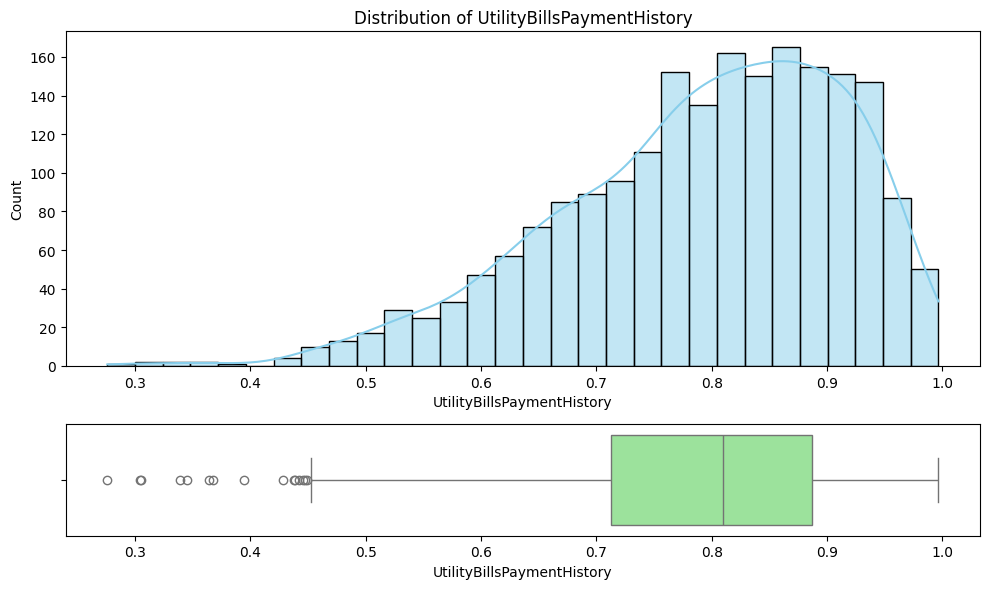

count    2050.000000
mean        0.791977
std         0.122874
min         0.276100
25%         0.712901
50%         0.809762
75%         0.887293
max         0.996563
Name: UtilityBillsPaymentHistory, dtype: float64

In [42]:
plot_numeric_distribution(df, 'UtilityBillsPaymentHistory')
df['UtilityBillsPaymentHistory'].describe()

Distribution: left-skewed

Most values fall between 0.71 and 0.89.

Median is around 0.81 (≈81%).

A few outliers are as low as 0.28, indicating unusually small values compared to the majority.


Because none of the variables are normal and normalization methods did not work, we use parametric tests to confirm or reject the hypotheses.

C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


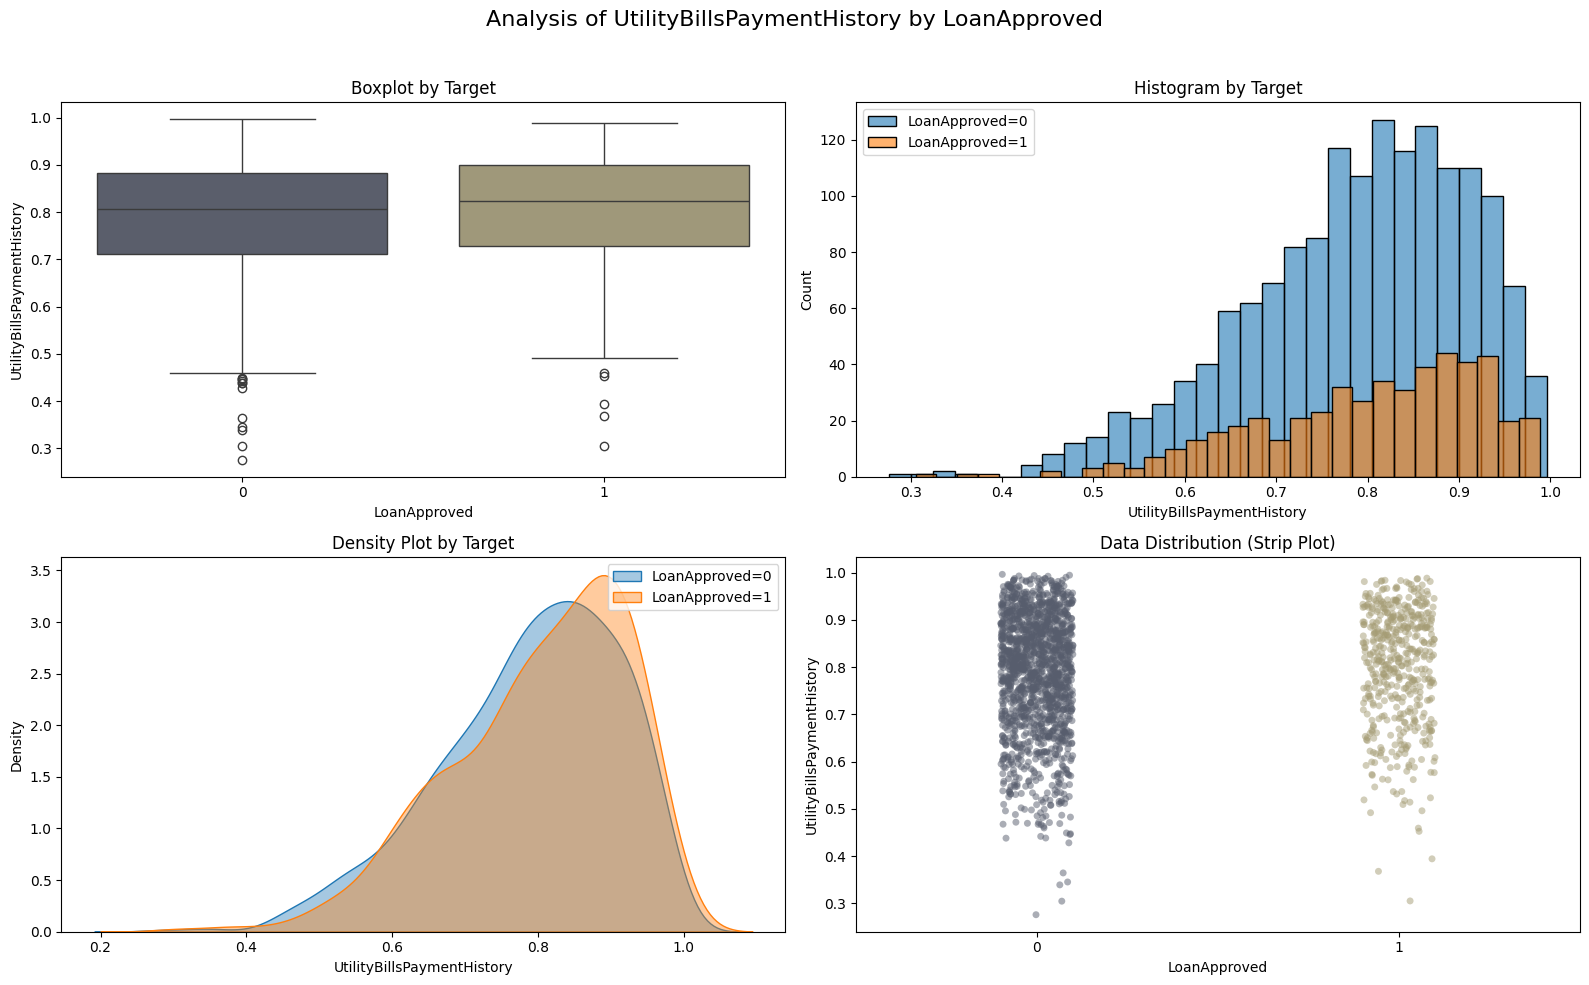

In [ ]:
plot_numeric_vs_target(df, numeric_col='UtilityBillsPaymentHistory', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of UtilityBillsPaymentHistory is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of UtilityBillsPaymentHistory is different between the two groups.

In [ ]:
group0 = df[df['LoanApproved'] == 0]['UtilityBillsPaymentHistory'].dropna()
group1 = df[df['LoanApproved'] == 1]['UtilityBillsPaymentHistory'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 355391.0
P-value: 0.01900583727061986
✅ There is a statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


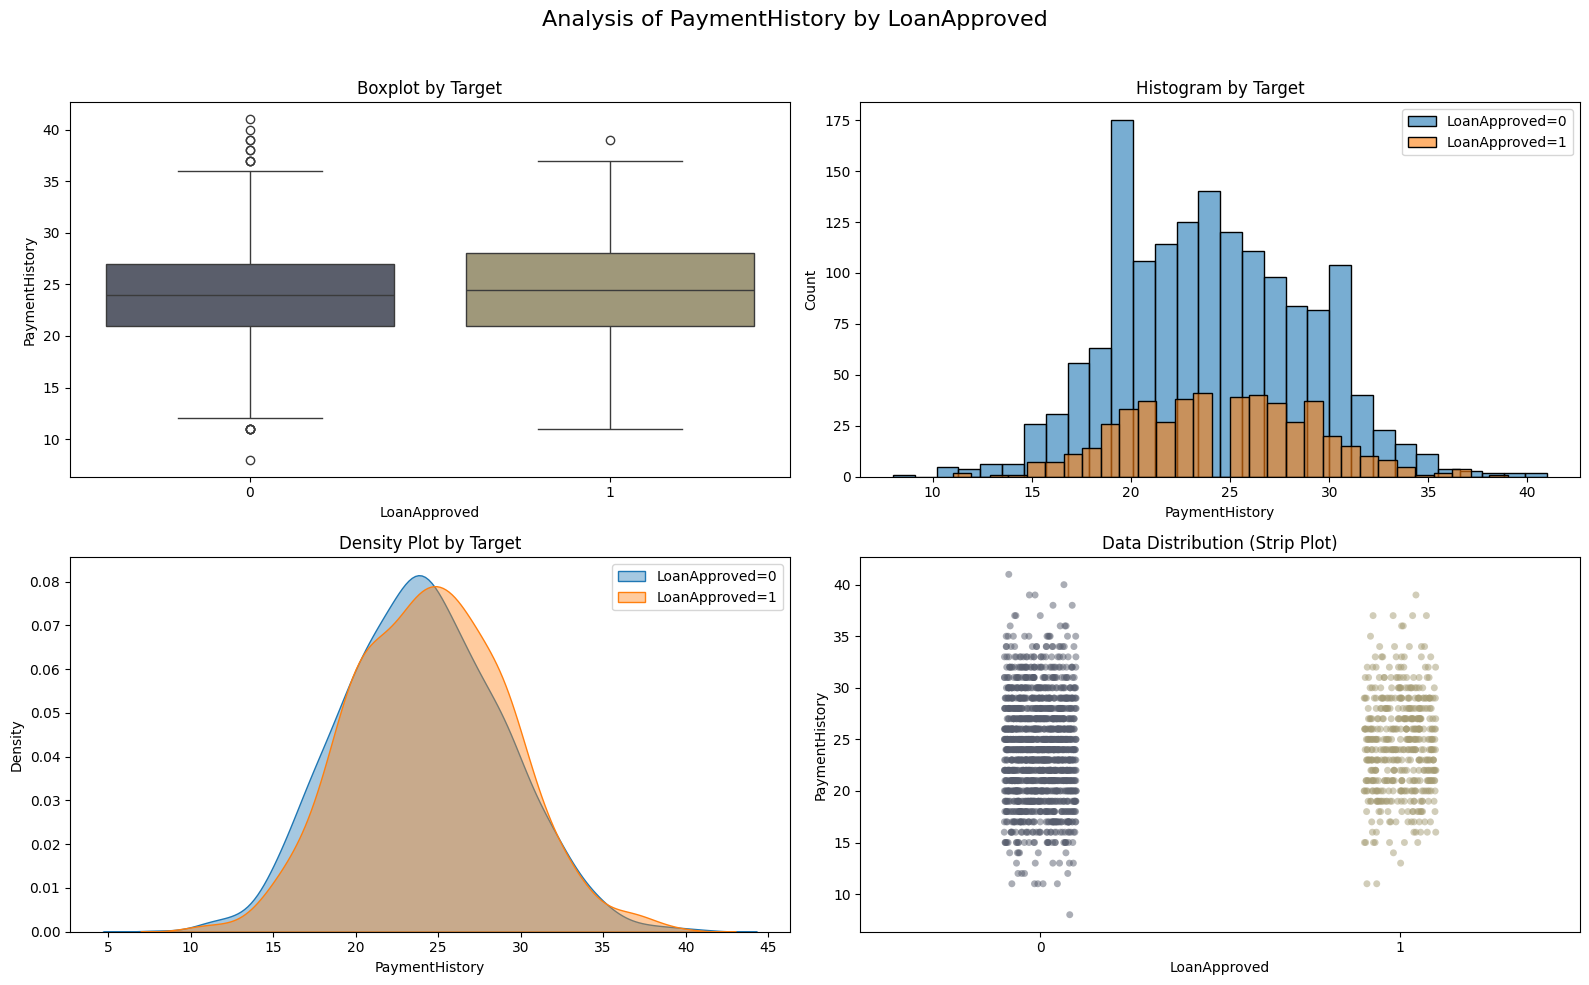

In [ ]:
plot_numeric_vs_target(df, numeric_col='PaymentHistory', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of PaymentHistory is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of PaymentHistory is different between the two groups.

In [49]:
group0 = df[df['LoanApproved'] == 0]['PaymentHistory'].dropna()
group1 = df[df['LoanApproved'] == 1]['PaymentHistory'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 359918.0
P-value: 0.050794241269954174
There is no statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


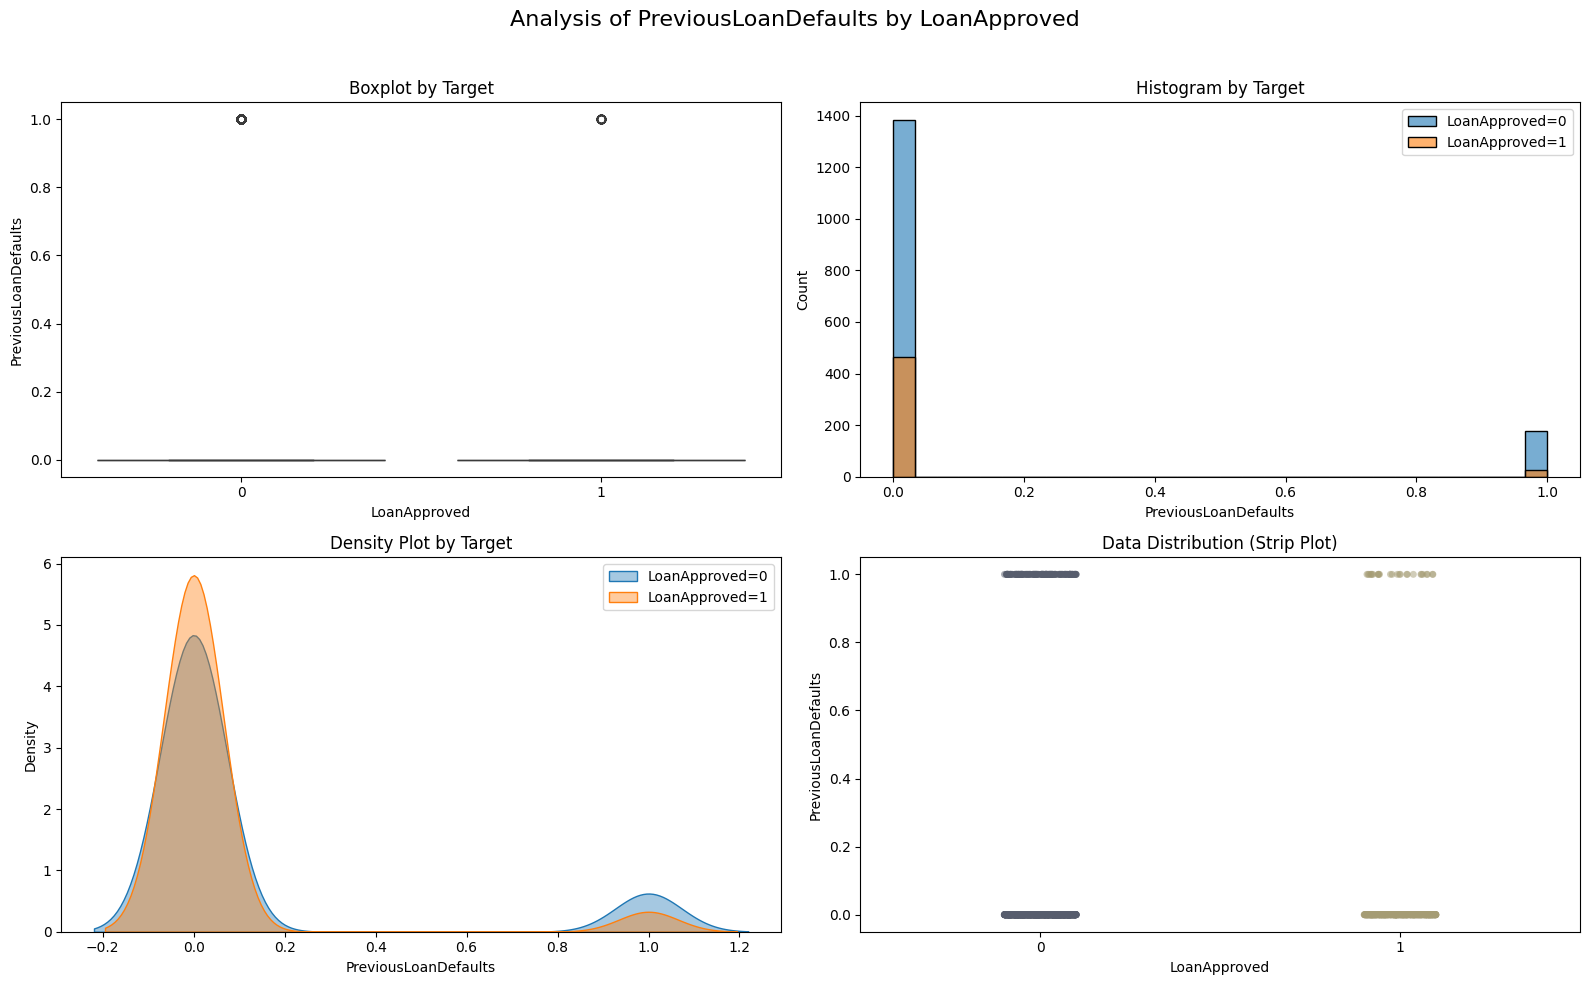

In [ ]:
plot_numeric_vs_target(df, numeric_col='PreviousLoanDefaults', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of PreviousLoanDefaults is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of PreviousLoanDefaults is different between the two groups.

In [ ]:
group0 = df[df['LoanApproved'] == 0]['PreviousLoanDefaults'].dropna()
group1 = df[df['LoanApproved'] == 1]['PreviousLoanDefaults'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 405530.0
P-value: 8.26633927124694e-05
There is a statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


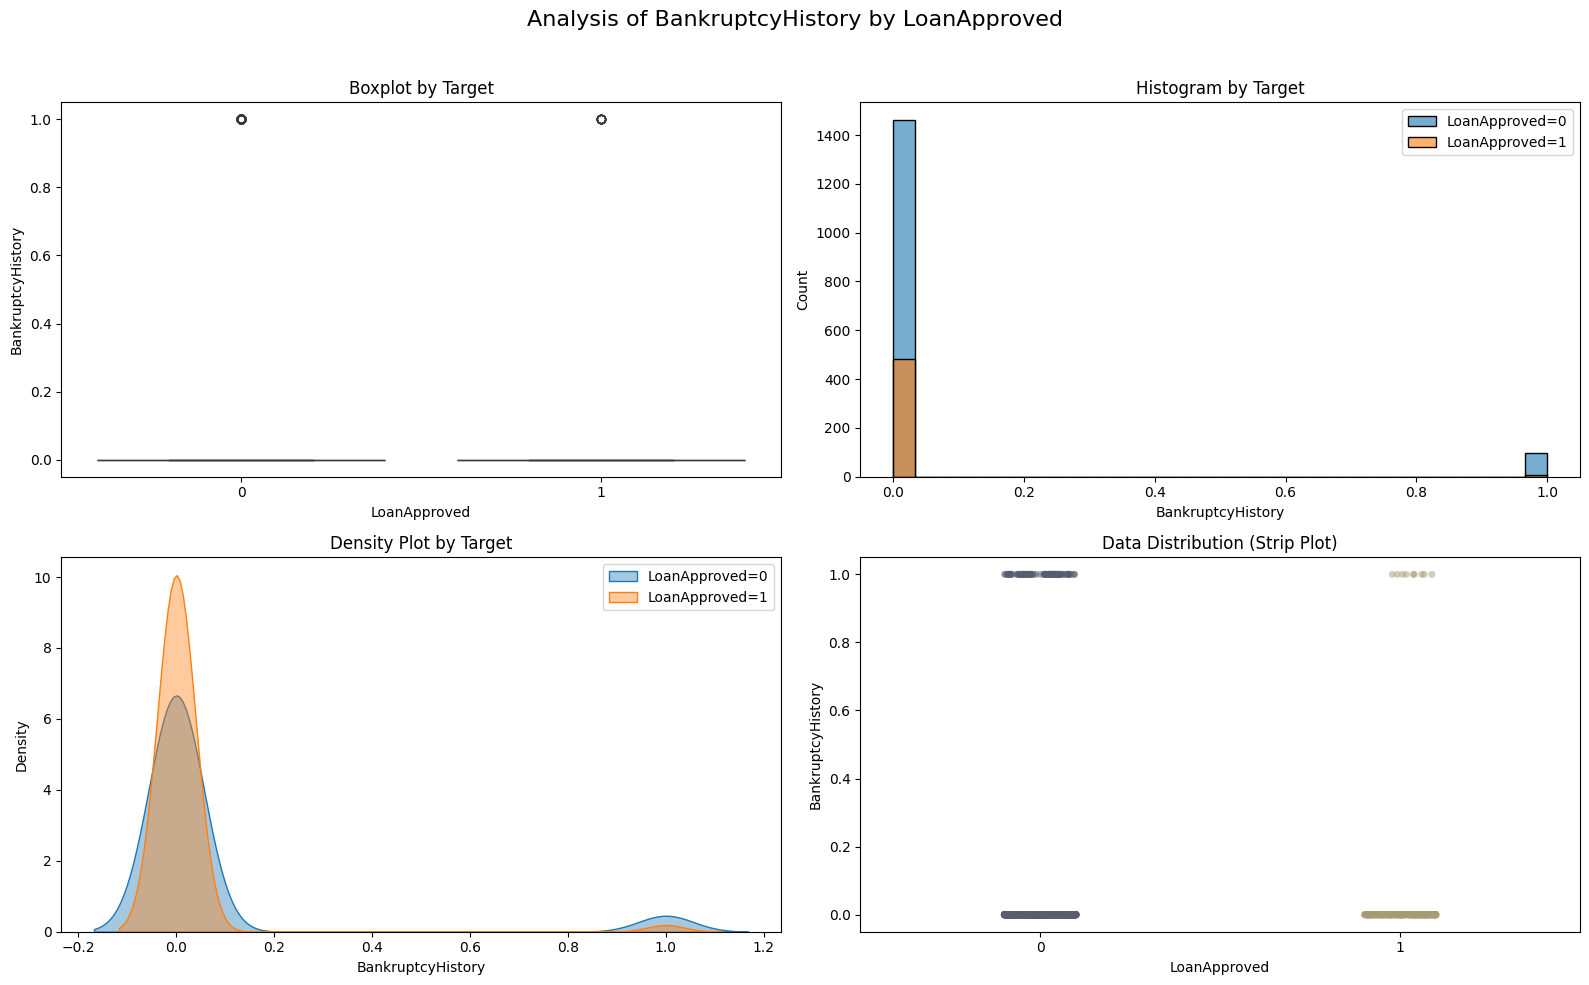

In [ ]:
plot_numeric_vs_target(df, numeric_col='BankruptcyHistory', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of BankruptcyHistory is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of BankruptcyHistory is different between the two groups.

In [53]:
group0 = df[df['LoanApproved'] == 0]['BankruptcyHistory'].dropna()
group1 = df[df['LoanApproved'] == 1]['BankruptcyHistory'].dropna()


stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 399435.0
P-value: 9.749111942617552e-05
There is a statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


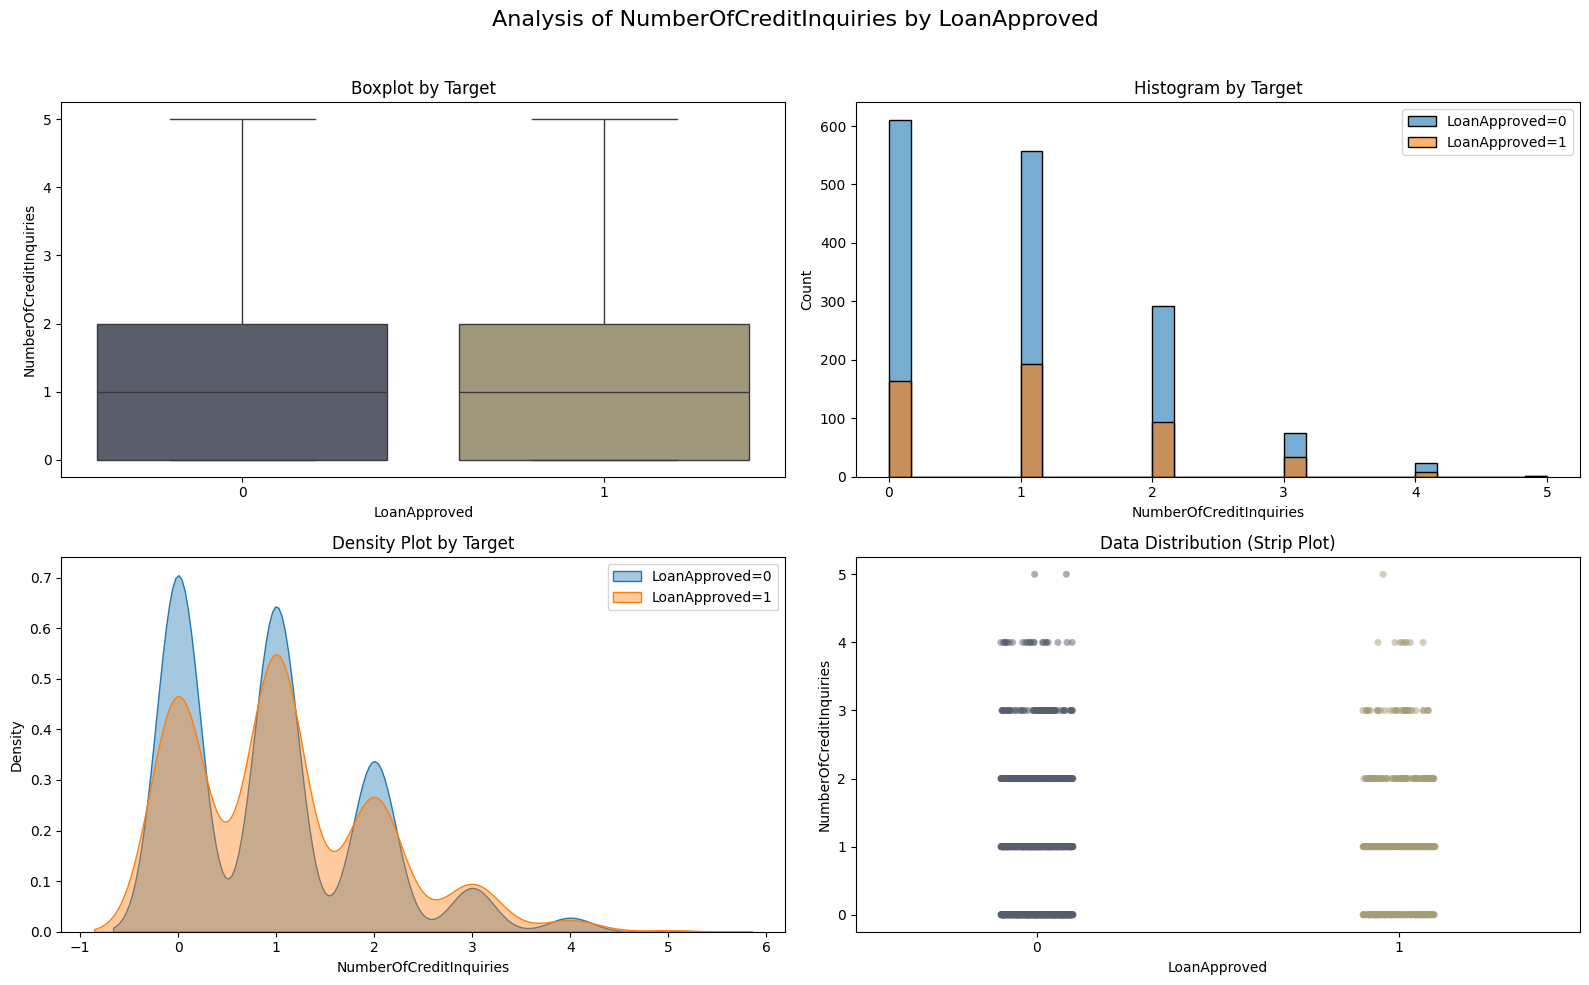

In [ ]:
plot_numeric_vs_target(df, numeric_col='NumberOfCreditInquiries', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of NumberOfCreditInquiries is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of NumberOfCreditInquiries is different between the two groups.

In [56]:
group0 = df[df['LoanApproved'] == 0]['NumberOfCreditInquiries'].dropna()
group1 = df[df['LoanApproved'] == 1]['NumberOfCreditInquiries'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 358672.5
P-value: 0.02919873505880996
There is a statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


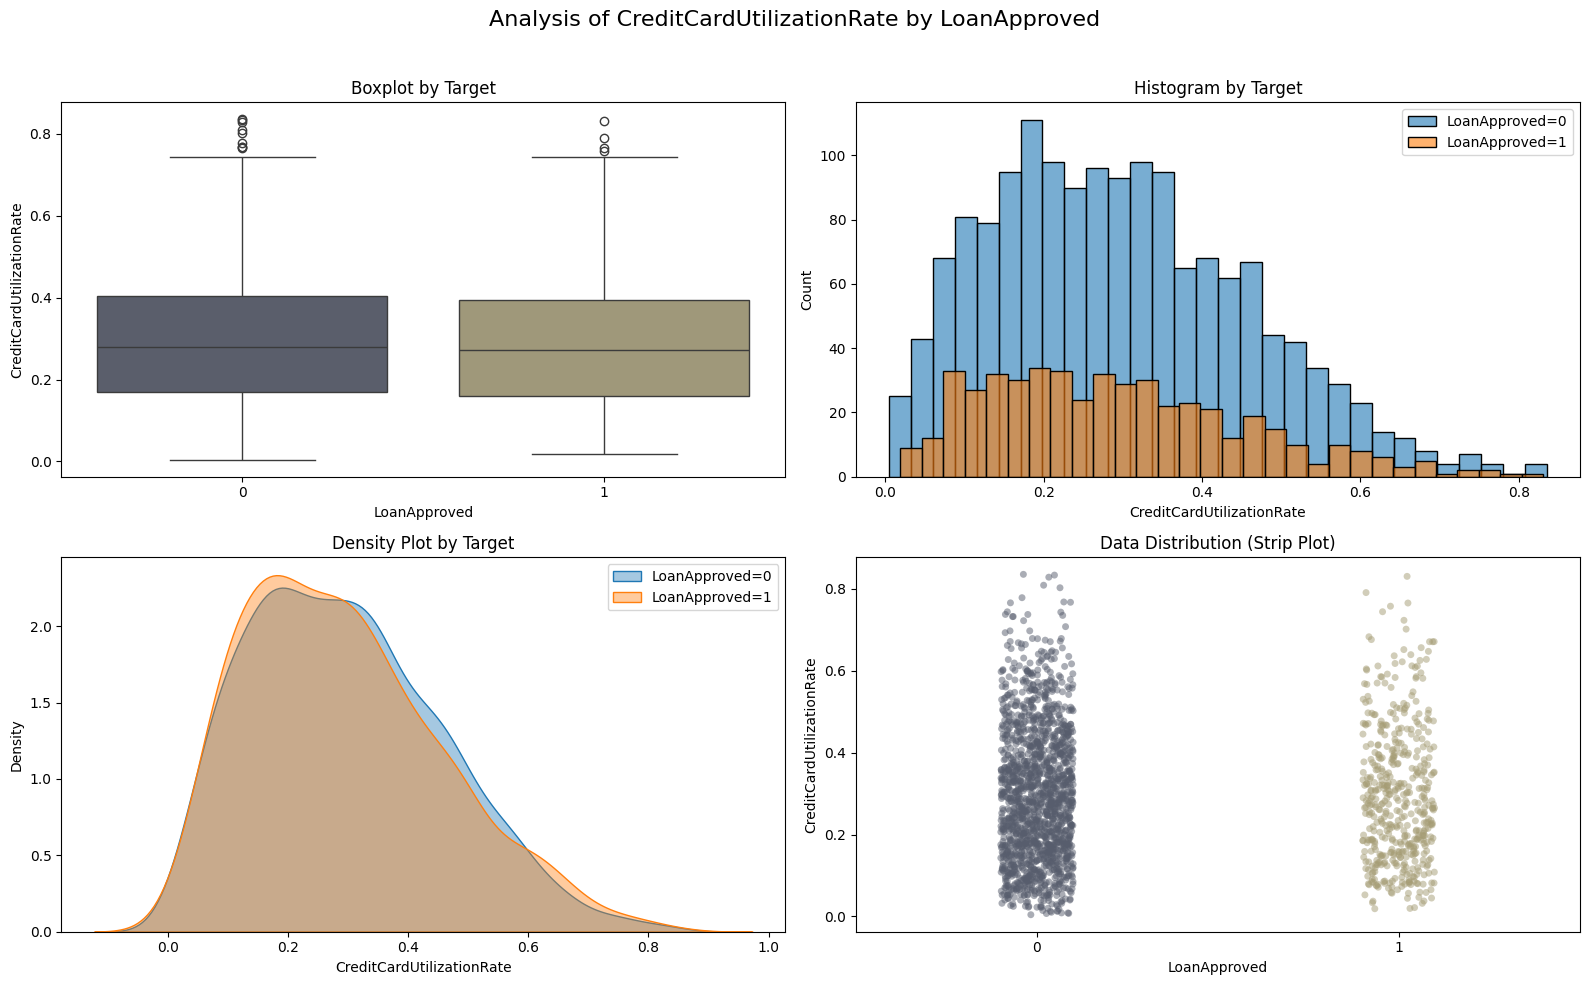

In [ ]:
plot_numeric_vs_target(df, numeric_col='CreditCardUtilizationRate', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of CreditCardUtilizationRate is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of CreditCardUtilizationRate is different between the two groups.

In [58]:
group0 = df[df['LoanApproved'] == 0]['CreditCardUtilizationRate'].dropna()
group1 = df[df['LoanApproved'] == 1]['CreditCardUtilizationRate'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 389838.0
P-value: 0.5040135894642686
There is no statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


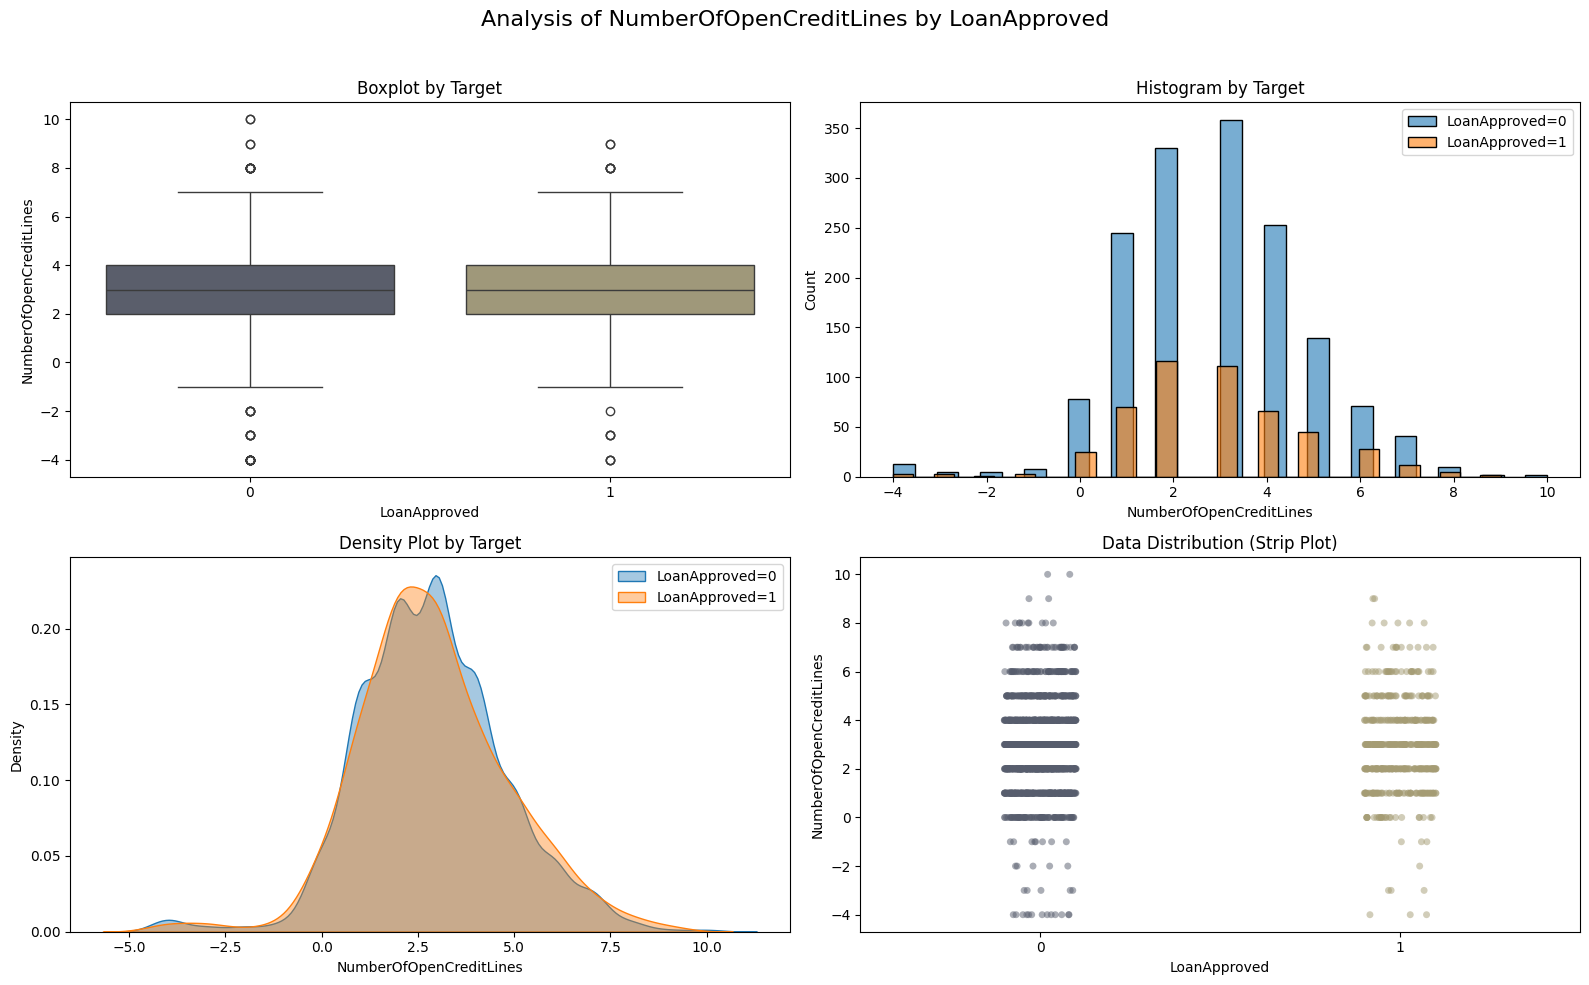

In [ ]:
plot_numeric_vs_target(df, numeric_col='NumberOfOpenCreditLines', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of NumberOfOpenCreditLines is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of NumberOfOpenCreditLines is different between the two groups.

In [61]:
group0 = df[df['LoanApproved'] == 0]['NumberOfOpenCreditLines'].dropna()
group1 = df[df['LoanApproved'] == 1]['NumberOfOpenCreditLines'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 381436.0
P-value: 0.9459092558316304
There is no statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


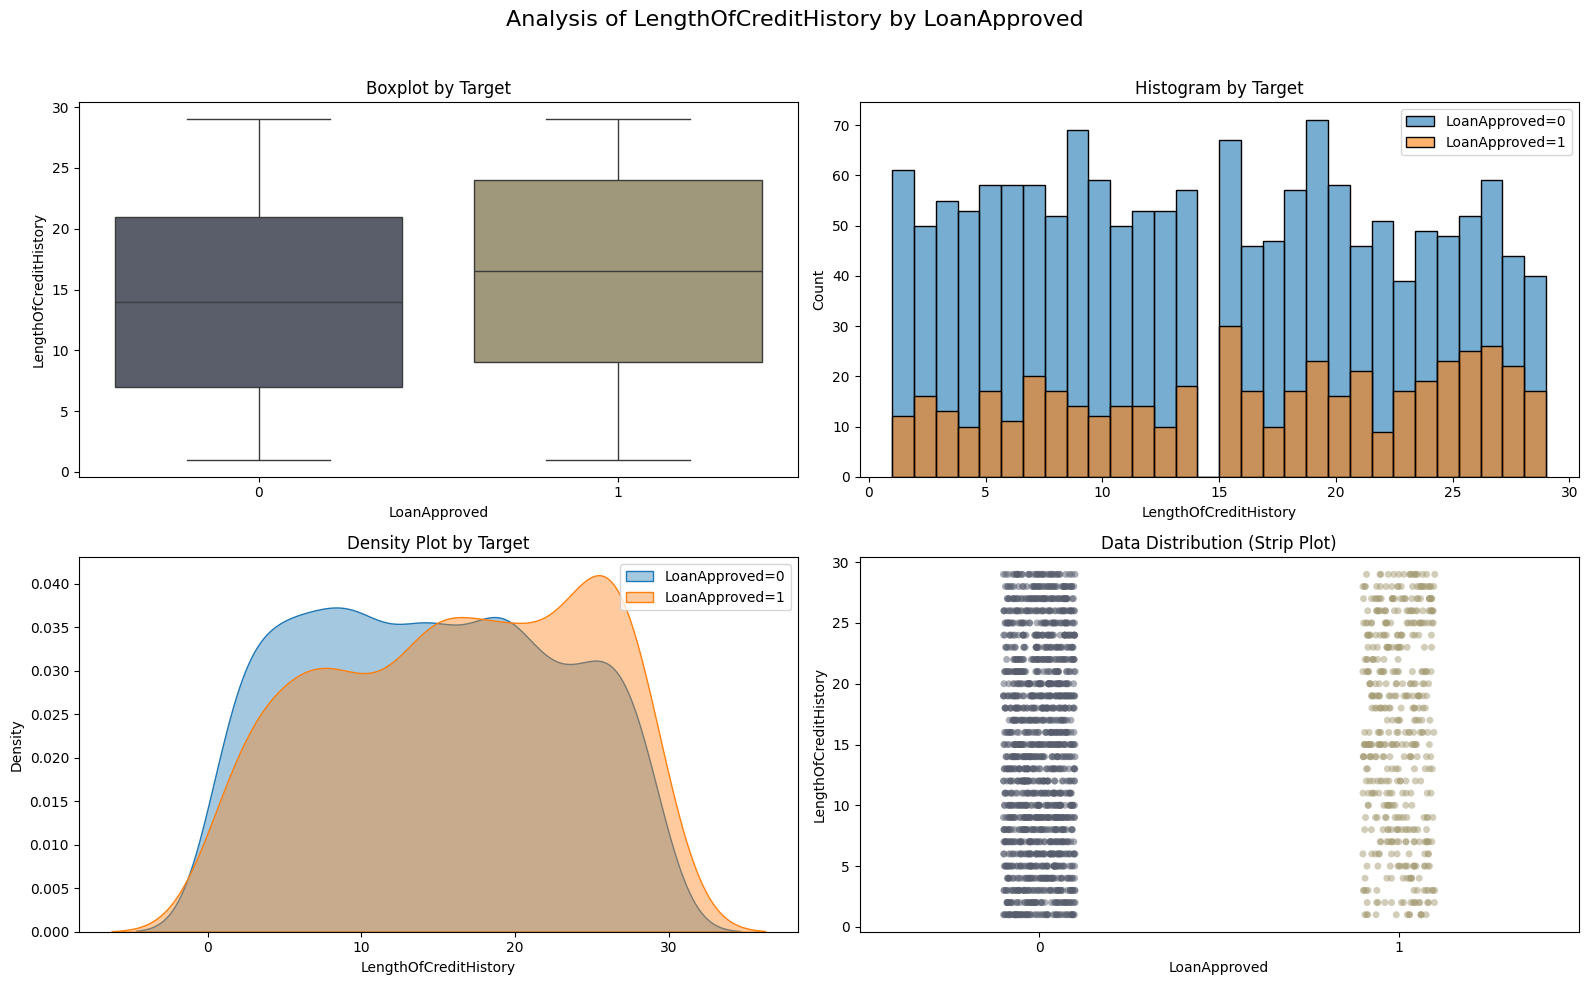

In [ ]:
plot_numeric_vs_target(df, numeric_col='LengthOfCreditHistory', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of LengthOfCreditHistory is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of LengthOfCreditHistory is different between the two groups.

In [63]:
group0 = df[df['LoanApproved'] == 0]['LengthOfCreditHistory'].dropna()
group1 = df[df['LoanApproved'] == 1]['LengthOfCreditHistory'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 335554.0
P-value: 4.4365309836061036e-05
There is a statistically significant difference between the two groups.


C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x=target_col, y=numeric_col, palette='cividis')
C:\Users\ali\AppData\Local\Temp\ipykernel_10652\2794489780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1, 1], data=df, x=target_col, y=numeric_col,


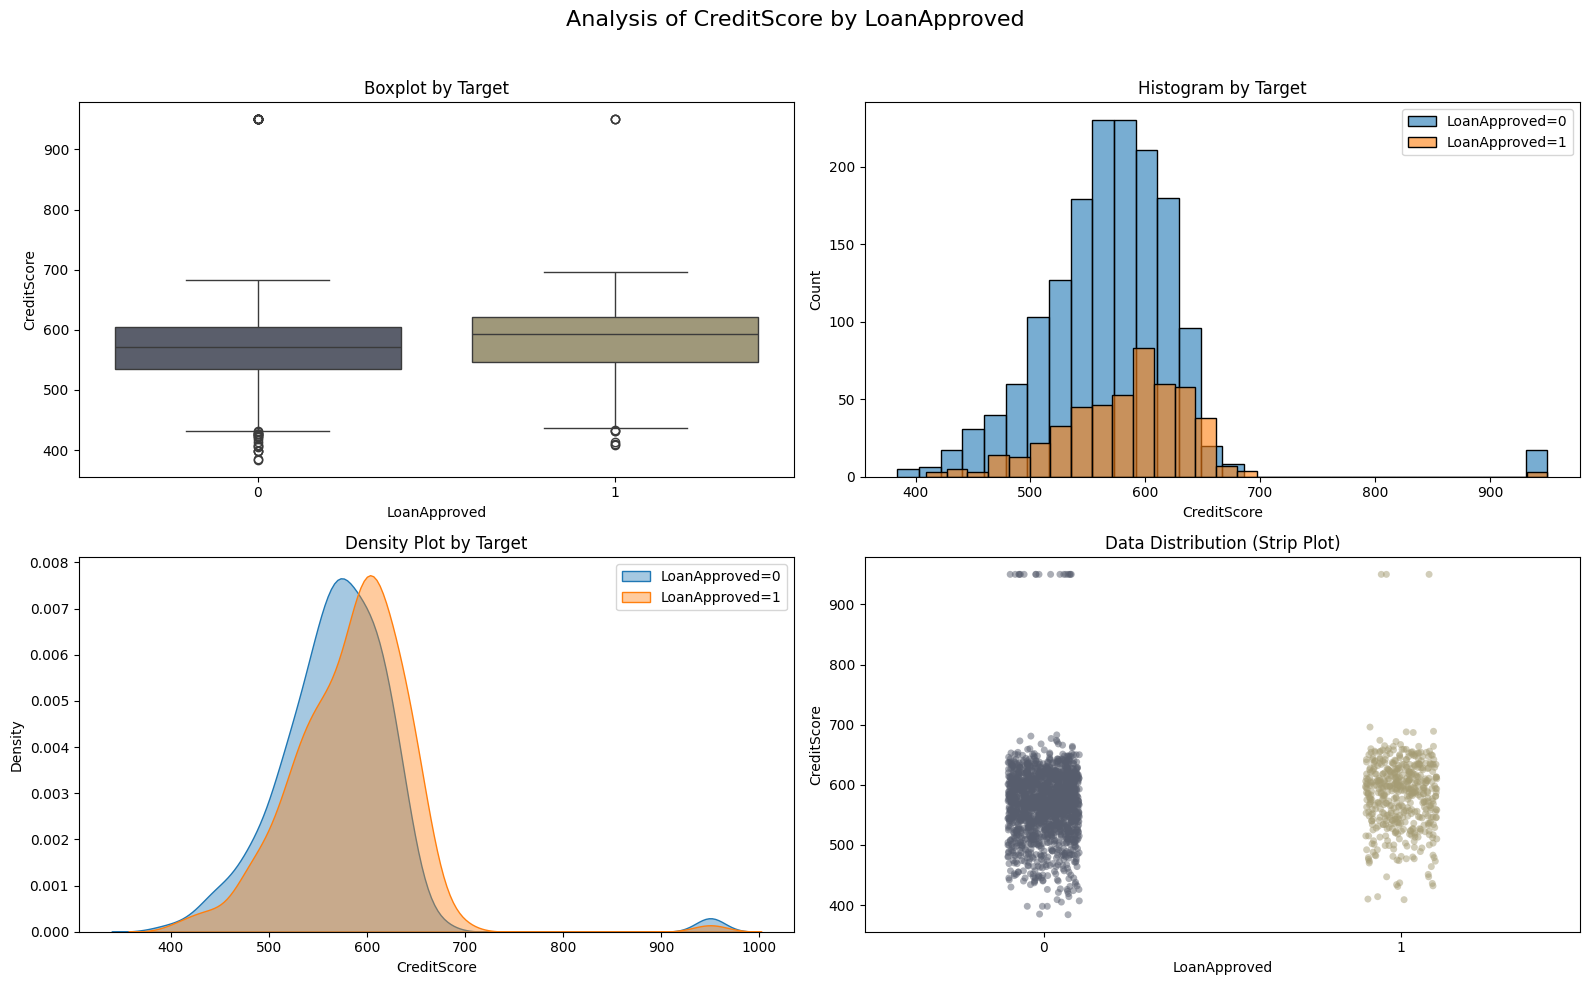

In [ ]:
plot_numeric_vs_target(df, numeric_col='CreditScore', target_col='LoanApproved')

Null Hypothesis (H₀):

The distribution of CreditScore is the same for both groups (LoanApproved = 0 and LoanApproved = 1).

Alternative Hypothesis (H₁):

The distribution of CreditScore is different between the two groups.

In [ ]:
group0 = df[df['LoanApproved'] == 0]['CreditScore'].dropna()
group1 = df[df['LoanApproved'] == 1]['CreditScore'].dropna()

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Mann-Whitney U Test:
Statistic: 310618.5
P-value: 3.7860961414833876e-10
✅ There is a statistically significant difference between the two groups.
